مشروع تشخيص امراض القلب 

1 - جمع البيانات 

In [1]:
import pandas as pd 
heart_data =pd.read_csv('heart_disease_uci.csv')
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


 2 - معالجة البيانات وتنظيفها لضمان جودتها، والتأكد من إزالة البيانات المفقودة أو المتناقضه

In [3]:
# عرض ملخص عن القيم المفقودة
print("عدد القيم المفقودة في كل عمود:")
print(heart_data.isnull().sum())

عدد القيم المفقودة في كل عمود:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [4]:
# احذف الصفوف التي تحتوي على قيم مفقودة
data_dropna = heart_data.dropna()

#استبدال القيم المفقودة بمتوسط العمود (للأعمدة العددية)
heart_data['trestbps'].fillna(heart_data['trestbps'].mean(), inplace=True)
heart_data['chol'].fillna(heart_data['chol'].mean(), inplace=True)
heart_data['thalch'].fillna(heart_data['thalch'].mean(), inplace=True)
heart_data['oldpeak'].fillna(heart_data['oldpeak'].mean(), inplace=True)
heart_data['ca'].fillna(heart_data['ca'].mean(), inplace=True)

#استبدال القيم المفقودة بأكثر القيم تكرارًا (للأعمدة الفئوية)
heart_data['fbs'].fillna(heart_data['fbs'].mode()[0], inplace=True)
heart_data['restecg'].fillna(heart_data['restecg'].mode()[0], inplace=True)
heart_data['exang'].fillna(heart_data['exang'].mode()[0], inplace=True)
heart_data['slope'].fillna(heart_data['slope'].mode()[0], inplace=True)
heart_data['thal'].fillna(heart_data['thal'].mode()[0], inplace=True)

In [5]:
# عرض ملخص عن القيم المفقودة بعد المعالجة
print("\nعدد القيم المفقودة في كل عمود بعد المعالجة:")
print(heart_data.isnull().sum())


عدد القيم المفقودة في كل عمود بعد المعالجة:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.6+ KB


In [7]:
# حذف الاعمده الغير المهمه 

# حذف الأعمدة
columns_to_drop = ['id','dataset']
heart_data = heart_data.drop(columns=columns_to_drop)

# عرض البيانات بعد حذف الأعمدة للتأكد
print("الأعمدة بعد الحذف:")
print(heart_data.head())

الأعمدة بعد الحذف:
   age     sex               cp  trestbps   chol    fbs         restecg  \
0   63    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male      non-anginal     130.0  250.0  False          normal   
4   41  Female  atypical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak        slope   ca               thal  num  
0   150.0  False      2.3  downsloping  0.0       fixed defect    0  
1   108.0   True      1.5         flat  3.0             normal    2  
2   129.0   True      2.6         flat  2.0  reversable defect    1  
3   187.0  False      3.5  downsloping  0.0             normal    0  
4   172.0  False      1.4    upsloping  0.0             normal    0  


In [8]:
# 1. التحقق من وجود قيم غير منطقية أو سالبة
invalid_values = {}

# التحقق من الأعمدة التي يجب أن تكون فيها القيم إيجابية
columns_positive = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for column in columns_positive:
    if any(heart_data[column] < 0):
        invalid_values[column] = heart_data[heart_data[column] < 0]

In [9]:
# 2. التحقق من القيم الفئوية للتأكد من عدم وجود تناقضات أو أخطاء إملائية
categorical_columns = ['sex', 'cp','restecg','exang','thal']
for column in categorical_columns:
    print(f"القيم الفريدة في العمود '{column}':")
    print(heart_data[column].unique())
    print("\n---------------------------\n")

القيم الفريدة في العمود 'sex':
['Male' 'Female']

---------------------------

القيم الفريدة في العمود 'cp':
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

---------------------------

القيم الفريدة في العمود 'restecg':
['lv hypertrophy' 'normal' 'st-t abnormality']

---------------------------

القيم الفريدة في العمود 'exang':
[False  True]

---------------------------

القيم الفريدة في العمود 'thal':
['fixed defect' 'normal' 'reversable defect']

---------------------------



In [10]:
if invalid_values:
    print("تم العثور على قيم غير منطقية أو سالبة:")
    for column, values in invalid_values.items():
        print(f"القيم غير المنطقية في العمود '{column}':")
        print(values)
else:
    print("لم يتم العثور على قيم غير منطقية أو سالبة في الأعمدة المحددة.")

تم العثور على قيم غير منطقية أو سالبة:
القيم غير المنطقية في العمود 'oldpeak':
     age   sex              cp  trestbps  chol    fbs           restecg  \
603   38  Male     non-anginal     100.0   0.0  False            normal   
609   42  Male    asymptomatic     105.0   0.0  False            normal   
614   45  Male     non-anginal     110.0   0.0  False            normal   
615   46  Male    asymptomatic     100.0   0.0  False  st-t abnormality   
629   51  Male    asymptomatic     130.0   0.0  False            normal   
653   56  Male     non-anginal     125.0   0.0  False            normal   
655   56  Male    asymptomatic     115.0   0.0  False  st-t abnormality   
656   56  Male    asymptomatic     120.0   0.0  False  st-t abnormality   
691   62  Male  typical angina     120.0   0.0  False    lv hypertrophy   
694   62  Male    asymptomatic     115.0   0.0  False            normal   
696   63  Male    asymptomatic     100.0   0.0  False            normal   
725   66  Male     no

In [11]:
g = heart_data['oldpeak'].unique()
g

array([ 2.3       ,  1.5       ,  2.6       ,  3.5       ,  1.4       ,
        0.8       ,  3.6       ,  0.6       ,  3.1       ,  0.4       ,
        1.3       ,  0.        ,  0.5       ,  1.6       ,  1.        ,
        1.2       ,  0.2       ,  1.8       ,  3.2       ,  2.4       ,
        2.        ,  2.5       ,  2.2       ,  2.8       ,  3.        ,
        3.4       ,  6.2       ,  4.        ,  5.6       ,  2.9       ,
        0.1       ,  2.1       ,  1.9       ,  4.2       ,  0.9       ,
        1.1       ,  3.8       ,  0.7       ,  0.3       ,  4.4       ,
        5.        ,  0.87878788, -1.1       , -1.5       , -0.1       ,
       -2.6       , -0.7       , -2.        , -1.        ,  1.7       ,
       -0.8       , -0.5       , -0.9       ,  3.7       ])

In [12]:
# التعامل مع القيم السالبة

#استبدال القيم السالبة بصفر
heart_data['oldpeak'] = heart_data['oldpeak'].apply(lambda x: 0 if x < 0 else x)
# التحقق من النتيجة النهائية
print("\nتحقق من القيم الفريدة في العمود 'oldpeak' بعد المعالجة:")
print(heart_data['oldpeak'].unique())


تحقق من القيم الفريدة في العمود 'oldpeak' بعد المعالجة:
[2.3        1.5        2.6        3.5        1.4        0.8
 3.6        0.6        3.1        0.4        1.3        0.
 0.5        1.6        1.         1.2        0.2        1.8
 3.2        2.4        2.         2.5        2.2        2.8
 3.         3.4        6.2        4.         5.6        2.9
 0.1        2.1        1.9        4.2        0.9        1.1
 3.8        0.7        0.3        4.4        5.         0.87878788
 1.7        3.7       ]


In [13]:
# 2. تحويل عمود 'num' إلى فئات 0 و 1 فقط
# 0:مريض قلب :1 , غير مريض قلب 
heart_data['num'] = heart_data['num'].apply(lambda x: 1 if x > 0 else 0)

3 - تحليل البيانات لاكتشاف الأنماط والعلاقات بين الأعراض والأمراض وتمثيلها مرئيا 

c:\Users\abdulla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


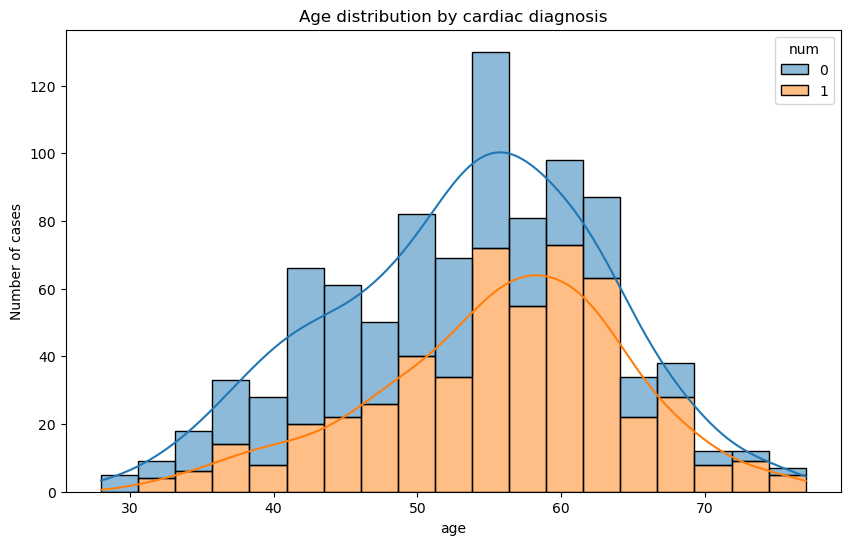

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. توزيع البيانات بين الأعراض والأمراض
# توزيع العمر بالنسبة لتشخيص أمراض القلب

# ضبط حجم الشكل البياني بعرض 10 وارتفاع 6
plt.figure(figsize=(10, 6))

# رسم مخطط بياني لتوزيع العمر باستخدام بيانات heart_data
# x احدد المحور الأفقي (العمر)
# hue يحدد التصنيف اللوني بناءً على العمود 'num' الذي يمثل التشخيص القلبي
# multiple='stack' يعني تكديس الأشرطة فوق بعضها
# kde=True يضيف منحنى الكثافة Kernel Density Estimation
sns.histplot(data=heart_data, x='age', hue='num', multiple='stack', kde=True)

# إضافة عنوان للرسم البياني
plt.title('Age distribution by cardiac diagnosis')

# تسمية المحور الأفقي
plt.xlabel('age')

# تسمية المحور العمودي
plt.ylabel('Number of cases')

# عرض الرسم البياني
plt.show()


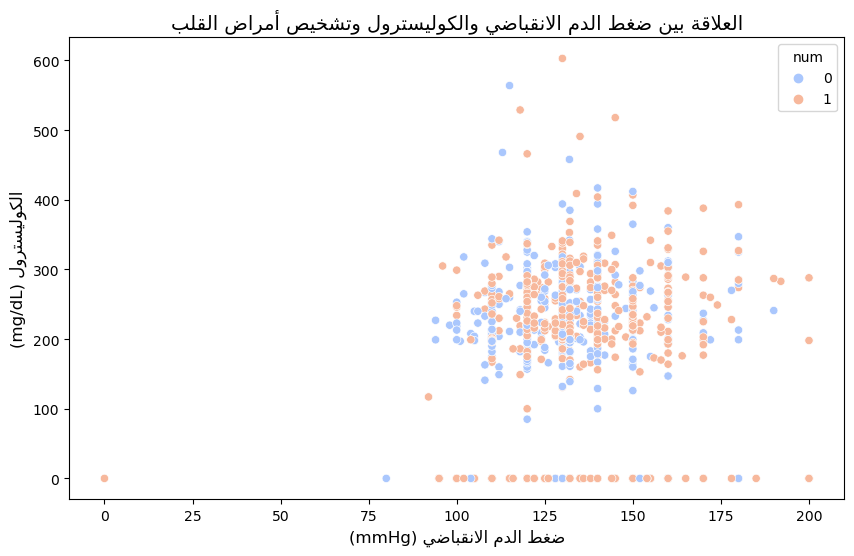

In [17]:
# 2. العلاقة بين ضغط الدم الانقباضي (trestbps) والكوليسترول (chol) وتشخيص أمراض القلب

# استيراد مكتبة arabic_reshaper لإعادة تشكيل النصوص العربية
import arabic_reshaper

# استيراد دالة get_display من مكتبة bidi لتصحيح اتجاه النص العربي
from bidi.algorithm import get_display

# تجهيز النصوص باللغة العربية عن طريق إعادة تشكيل النص وتصحيح اتجاهه
title_text = get_display(arabic_reshaper.reshape('العلاقة بين ضغط الدم الانقباضي والكوليسترول وتشخيص أمراض القلب'))
xlabel_text = get_display(arabic_reshaper.reshape('ضغط الدم الانقباضي (mmHg)'))
ylabel_text = get_display(arabic_reshaper.reshape('الكوليسترول (mg/dL)'))

# إعداد البيانات وضبط حجم الشكل البياني بعرض 10 وارتفاع 6
plt.figure(figsize=(10, 6))

# رسم مخطط بياني نقطي يوضح العلاقة بين ضغط الدم الانقباضي والكوليسترول
# x يحدد المحور الأفقي (ضغط الدم الانقباضي)
# y يحدد المحور العمودي (الكوليسترول)
# hue يحدد التصنيف اللوني بناءً على التشخيص القلبي (العمود 'num')
# palette='coolwarm' لتحديد الألوان المستخدمة في المخطط
sns.scatterplot(data=heart_data, x='trestbps', y='chol', hue='num', palette='coolwarm')

# إضافة العناوين باللغة العربية للمخطط والمحاور
plt.title(title_text, fontsize=14)
plt.xlabel(xlabel_text, fontsize=12)
plt.ylabel(ylabel_text, fontsize=12)

# عرض المخطط البياني
plt.show()


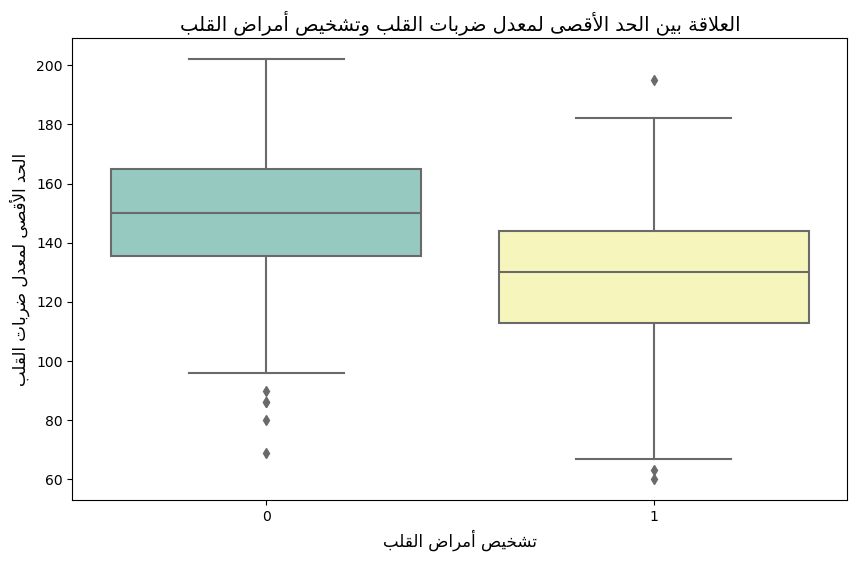

In [18]:
# 3. العلاقة بين الحد الأقصى لمعدل ضربات القلب (thalch) وتشخيص أمراض القلب

# استيراد مكتبة arabic_reshaper لإعادة تشكيل النصوص العربية
import arabic_reshaper

# استيراد دالة get_display من مكتبة bidi لتصحيح اتجاه النص العربي
from bidi.algorithm import get_display

# تجهيز النصوص باللغة العربية عن طريق إعادة تشكيل النص وتصحيح اتجاهه
title_text = get_display(arabic_reshaper.reshape('العلاقة بين الحد الأقصى لمعدل ضربات القلب وتشخيص أمراض القلب'))
xlabel_text = get_display(arabic_reshaper.reshape('تشخيص أمراض القلب'))
ylabel_text = get_display(arabic_reshaper.reshape('الحد الأقصى لمعدل ضربات القلب'))

# إعداد البيانات وضبط حجم الشكل البياني بعرض 10 وارتفاع 6
plt.figure(figsize=(10, 6))


# x يحدد المحور الأفقي (تشخيص أمراض القلب)
# y يحدد المحور العمودي (الحد الأقصى لمعدل ضربات القلب)
# palette='Set3' لتحديد الألوان المستخدمة في المخطط من لوحة الألوان Set3
sns.boxplot(data=heart_data, x='num', y='thalch', palette='Set3')

# إضافة العناوين باللغة العربية للمخطط والمحاور
plt.title(title_text, fontsize=14)
plt.xlabel(xlabel_text, fontsize=12)
plt.ylabel(ylabel_text, fontsize=12)

# عرض المخطط البياني
plt.show()



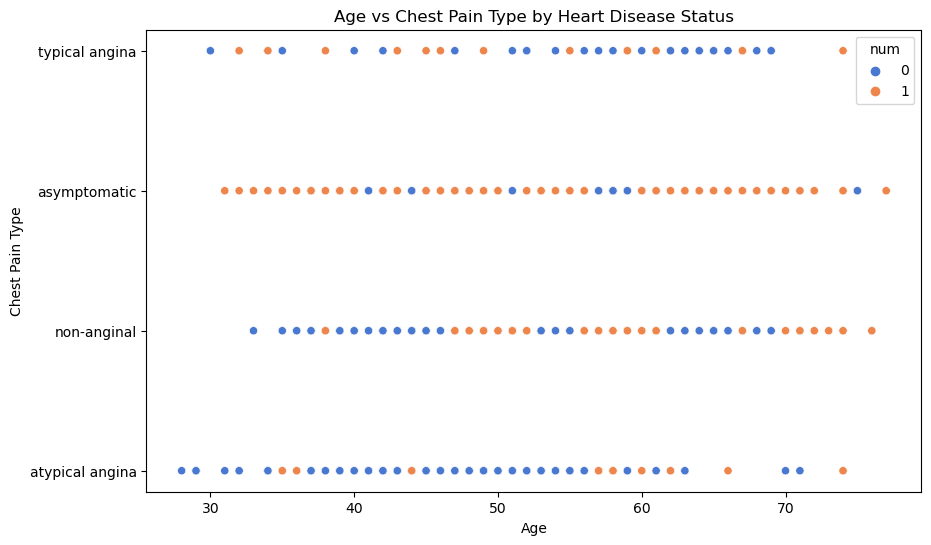

In [19]:
# 4. العلاقة بين العمر ونوع ألم الصدر (Scatter Plot)

# ضبط حجم الشكل البياني بعرض 10 وارتفاع 6
plt.figure(figsize=(10, 6))

# رسم مخطط بياني نقطي يوضح العلاقة بين العمر ونوع آلام الصدر
# x يحدد المحور الأفقي (العمر)
# y يحدد المحور العمودي (نوع آلام الصدر)
# hue يحدد التصنيف اللوني بناءً على حالة مرض القلب (العمود 'num')
# palette='muted' لتحديد الألوان المستخدمة في المخطط بتدرجات ة
sns.scatterplot(data=heart_data, x='age', y='cp', hue='num', palette='muted')

# إضافة عنوان للرسم البياني
plt.title('Age vs Chest Pain Type by Heart Disease Status')

# تسمية المحور الأفقي
plt.xlabel('Age')

# تسمية المحور العمودي
plt.ylabel('Chest Pain Type')

# عرض المخطط البياني
plt.show()


c:\Users\abdulla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


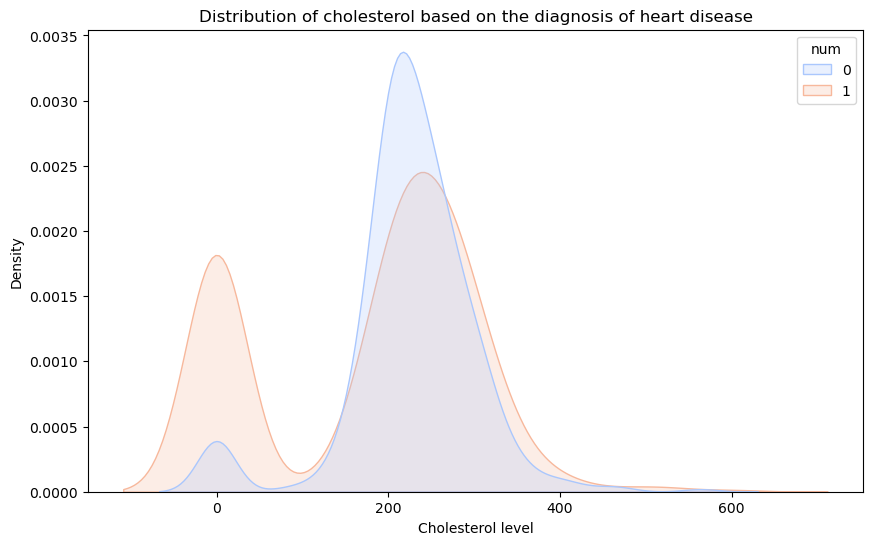

In [20]:
# 5. توزيع الكوليسترول بناءً على تشخيص أمراض القلب

# ضبط حجم الشكل البياني بعرض 10 وارتفاع 6
plt.figure(figsize=(10, 6))
# x يحدد المحور الأفقي (مستوى الكوليسترول)
# hue يحدد التصنيف اللوني بناءً على التشخيص القلبي (العمود 'num')
# fill=True لملء المساحة تحت منحنى الكثافة
# palette='coolwarm' لتحديد الألوان المستخدمة في المخطط ئ
sns.kdeplot(data=heart_data, x='chol', hue='num', fill=True, palette='coolwarm')

# إضافة عنوان للرسم البياني
plt.title('Distribution of cholesterol based on the diagnosis of heart disease')

# تسمية المحور الأفقي
plt.xlabel('Cholesterol level')

# تسمية المحور العمودي
plt.ylabel('Density')

# عرض المخطط البياني
plt.show()


c:\Users\abdulla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abdulla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


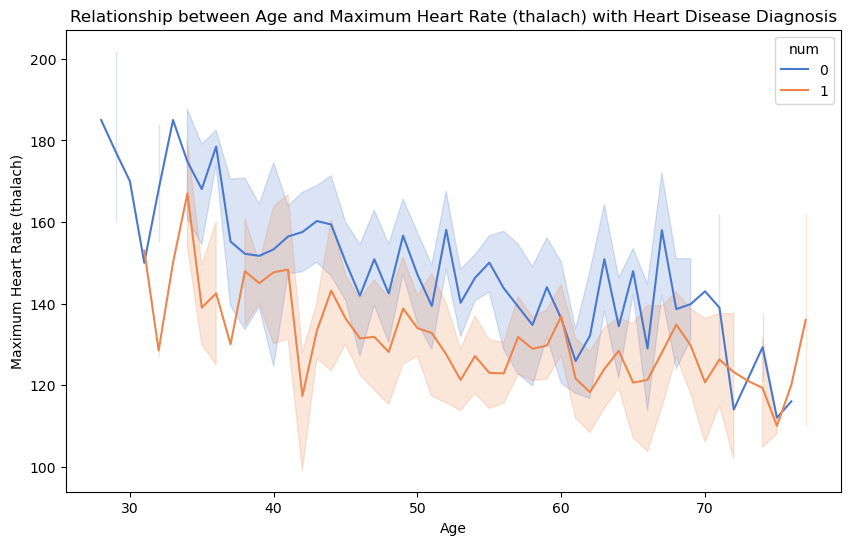

In [22]:
# 6. العلاقة بين العمر والحد الأقصى لمعدل ضربات القلب مع تشخيص أمراض القلب

# ضبط حجم الشكل البياني بعرض 10 وارتفاع 6
plt.figure(figsize=(10, 6))

# x يحدد المحور الأفقي (العمر)
# y يحدد المحور العمودي (الحد الأقصى لمعدل ضربات القلب)
# hue يحدد التصنيف اللوني بناءً على تشخيص أمراض القلب (العمود 'num')
# palette='muted' لتحديد الألوان المستخدمة في المخططة
sns.lineplot(data=heart_data, x='age', y='thalch', hue='num', palette='muted')

# إضافة عنوان للرسم البياني
plt.title('Relationship between Age and Maximum Heart Rate (thalach) with Heart Disease Diagnosis')

# تسمية المحور الأفقي
plt.xlabel('Age')

# تسمية المحور العمودي
plt.ylabel('Maximum Heart Rate (thalach)')

# عرض المخطط البياني
plt.show()



4 - ترميز وتجهيز البيانات لتدريب النموذج 

In [24]:
from sklearn.preprocessing import LabelEncoder
#القيم ذات صنفين 

# إظهار القيم الفريدة في الأعمدة  قبل الترميز
print("Unique values in 'sex' before encoding:", heart_data['sex'].unique())
print("Unique values in 'exang' before encoding:", heart_data['exang'].unique())
print("Unique values in 'fbs' before encoding:", heart_data['fbs'].unique())
print('...........................................')

# إنشاء كائن LabelEncoder لكل عمود
label_encoder_sex = LabelEncoder()
label_encoder_exang = LabelEncoder()
label_encoder_fbs = LabelEncoder()


# ترميز العمود "sex"
heart_data['sex'] = label_encoder_sex.fit_transform(heart_data['sex'])

# ترميز العمود "exang"
heart_data['exang'] = label_encoder_exang.fit_transform(heart_data['exang'])

# ترميز العمود "fbs"
heart_data['fbs'] = label_encoder_exang.fit_transform(heart_data['fbs'])


# إظهار القيم الفريدة في الأعمدة بعد الترميز
print("Unique values in 'sex' after encoding:", heart_data['sex'].unique())
print("Unique values in 'exang' after encoding:", heart_data['exang'].unique())
print("Unique values in 'fbs' after encoding:", heart_data['fbs'].unique())

Unique values in 'sex' before encoding: ['Male' 'Female']
Unique values in 'exang' before encoding: [False  True]
Unique values in 'fbs' before encoding: [ True False]
...........................................
Unique values in 'sex' after encoding: [1 0]
Unique values in 'exang' after encoding: [0 1]
Unique values in 'fbs' after encoding: [1 0]


In [25]:
# متعدد الاصطناف

print("Unique values in 'cp' before encoding:", heart_data['cp'].unique())
print("Unique values in 'restecg' before encoding:", heart_data['restecg'].unique())
print("Unique values in 'thal' before encoding:", heart_data['thal'].unique())
print("Unique values in 'slope' before encoding:", heart_data['slope'].unique())
print('...........................................')

data =heart_data

# إنشاء كائن LabelEncoder لكل عمود
label_encoder_cp = LabelEncoder()
label_encoder_restecg = LabelEncoder()
label_encoder_thal= LabelEncoder()
label_encoder_slope= LabelEncoder()


# ترميز العمود "cp"
data['cp'] = label_encoder_cp.fit_transform(data['cp'])

# ترميز العمود "restecg"
data['restecg'] = label_encoder_restecg.fit_transform(data['restecg'])

# ترميز العمود "thal"
data['thal'] = label_encoder_thal.fit_transform(data['thal'])

# ترميز العمود "thal"
data['slope'] = label_encoder_thal.fit_transform(data['slope'])

# بعد الترميز
print("Unique values in 'cp' after encoding:", data['cp'].unique())
print("Unique values in 'restecg' after encoding:", data['restecg'].unique())
print("Unique values in 'thal' after encoding:", data['thal'].unique())
print("Unique values in 'slope' after encoding:", data['slope'].unique())

Unique values in 'cp' before encoding: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
Unique values in 'restecg' before encoding: ['lv hypertrophy' 'normal' 'st-t abnormality']
Unique values in 'thal' before encoding: ['fixed defect' 'normal' 'reversable defect']
Unique values in 'slope' before encoding: ['downsloping' 'flat' 'upsloping']
...........................................
Unique values in 'cp' after encoding: [3 0 2 1]
Unique values in 'restecg' after encoding: [0 1 2]
Unique values in 'thal' after encoding: [0 1 2]
Unique values in 'slope' after encoding: [0 1 2]


In [28]:
# تحقق من قيم الاعمده 
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [28]:
# حساب عدد القيم الفريدة في العمود 'num' وتكرارها
value_counts = heart_data['num'].value_counts()

# عرض النتيجة
value_counts


num
1    509
0    411
Name: count, dtype: int64

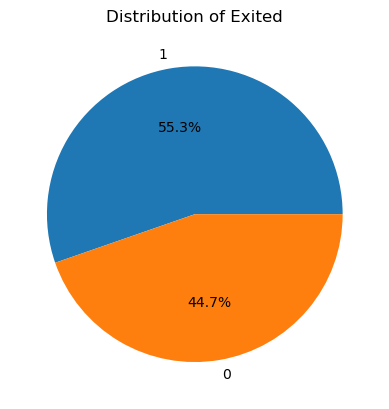

In [29]:
# استيراد مكتبة matplotlib لرسم المخططات البيانية
import matplotlib.pyplot as plt

# تعيين المتغير labels ليساوي الفهرس (index) من سلسلة value_counts
labels = value_counts.index

# تعيين المتغير counts ليساوي القيم (values) من سلسلة value_counts
counts = value_counts.values

# رسم مخطط دائري باستخدام القيم (counts) والتسميات (labels)
# autopct='%1.1f%%' يعرض النسبة المئوية لكل قطعة في المخطط بترميز عشري واحد
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# إضافة عنوان للمخطط الدائري
plt.title('Distribution of Exited')

# عرض المخطط
plt.show()


5 - تقسيم البيانات إلى مجموعات التدريب والاختبار , تقيس البيانات 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

X = heart_data.drop('num', axis=1)#عمود الدخل 
y = heart_data['num']# عمود الخرج 

#تقسيم البيانات إلى مجموعات التدريب والاختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# تقيس البيانات 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


6 - بناء الشبكه العصبيه 

In [43]:
# استيراد المكتبات اللازمة من Keras لبناء نموذج الشبكة العصبية
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# إنشاء نموذج تسلسلي Sequential
model = Sequential([
    # إضافة طبقة Dense (طبقة كاملة الترابط) مع 130 وحدة عصبية، باستخدام دالة تنشيط 'relu'
    # input_dim=X_train.shape[1] يشير إلى عدد الميزات في بيانات التدريب
    # kernel_regularizer='l2' يضيف تنظيم L2 لمنع النموذج من الإفراط في التكيف (overfitting)
    Dense(130, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'),
    
    # إضافة طبقة إسقاط (Dropout) بنسبة 40%، وهي تقنية لتقليل الإفراط في التكيف عن طريق تعطيل بعض الوحدات العصبية بشكل عشوائي أثناء التدريب
    Dropout(0.4),
    
    # إضافة طبقة Dense ثانية مع 64 وحدة عصبية ودالة تنشيط 'relu'
    Dense(64, activation='relu'),
    
    # إضافة طبقة إسقاط ثانية بنسبة 40%
    Dropout(0.4),
    
    # إضافة طبقة Dense ثالثة مع 32 وحدة عصبية ودالة تنشيط 'relu'
    Dense(32, activation='relu'),
    
    # إضافة طبقة الإخراج Dense مع وحدة عصبية واحدة ودالة تنشيط 'sigmoid'
    # دالة التنشيط 'sigmoid' تستخدم للحصول على احتمالية بين 0 و 1، مما يناسب مشاكل التصنيف الثنائي
    Dense(1, activation='sigmoid')
])

# تجميع النموذج (compile) مع تحديد المحسن (optimizer)،دالة الخساره د (loss function)، والمعايير التي ستستخدم لمتابعة الأداء (metrics)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# إعداد وظيفة الإيقاف المبكر (EarlyStopping) لمراقبة أداء النموذج أثناء التدريب
# patience=10 يعني إيقاف التدريب إذا لم يتحسن الأداء بعد 10 فترات متتالية
early_stopping = EarlyStopping(patience=10)

# تدريب النموذج على بيانات التدريب
# epochs=60 يشير إلى عدد الدورات الكاملة على بيانات التدريب
# batch_size=32  حجم الدفعه يحدد عدد العينات التي سيتم معالجتها قبل تحديث النموذج 
# validation_data=(X_test, y_test) تستخدم لمراقبة الأداء على مجموعة الاختبار في كل فترة (epoch)
# callbacks=[early_stopping] يشير إلى استخدام الإيقاف المبكر خلال التدريب
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/60


c:\Users\abdulla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5460 - loss: 0.9147 - val_accuracy: 0.7989 - val_loss: 0.7549
Epoch 2/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7702 - loss: 0.7267 - val_accuracy: 0.7989 - val_loss: 0.6599
Epoch 3/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7789 - loss: 0.6838 - val_accuracy: 0.7989 - val_loss: 0.6179
Epoch 4/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8103 - loss: 0.5879 - val_accuracy: 0.8098 - val_loss: 0.6208
Epoch 5/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8099 - loss: 0.6023 - val_accuracy: 0.7989 - val_loss: 0.5882
Epoch 6/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8337 - loss: 0.5595 - val_accuracy: 0.8043 - val_loss: 0.5767
Epoch 7/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8246 - loss: 0.5609 - val_accuracy: 0.8043 - val_loss: 0.5628
Epoch 8/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8347 - loss: 0.5398 - val_accuracy: 0.8098 - val_loss: 0.5539
E

In [44]:
# استيراد المقاييس اللازمة لتقييم أداء النموذج من مكتبة sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# استخدام النموذج المدرب للتنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# تحويل التنبؤات الاحتمالية إلى قيم ثنائية (0 أو 1)
# إذا كانت النتيجة أكبر من 0.5 يتم تصنيفها كـ 1 (إيجابية)، وإلا تصنف كـ 0 (سلبية)
y_pred_binary = (y_pred > 0.5)

#حساب صحة (accuracy) من خلال مقارنة القيم الحقيقية بالتنبؤات الثنائية
accuracy = accuracy_score(y_test, y_pred_binary)

# حساب الدقة الإيجابية (precision)، التي تقيس نسبة التنبؤات الإيجابية الصحيحة من جميع التنبؤات الإيجابية
precision = precision_score(y_test, y_pred_binary)

#حساب الاستذكار ء (recall)، الذي يقيس نسبة التنبؤات الإيجابية الصحيحة من جميع الحالات الإيجابية الفعلية
recall = recall_score(y_test, y_pred_binary)

# حساب مقياس F1، وهو المتوسط التوافقي بين الدقة والاستذكار، ويعطي فكرة عن الأداء العام للنموذج
f1 = f1_score(y_test, y_pred_binary)

# طباعة النتائج
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000022DD9B9C720> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Accuracy: 0.8532608695652174
Precision: 0.91
Recall: 0.8348623853211009
F1 Score: 0.8708133971291866


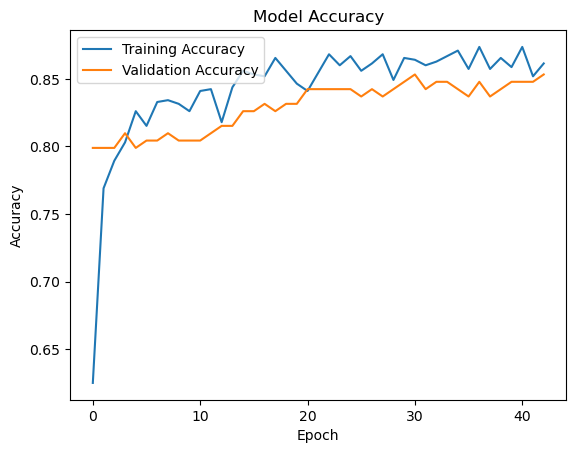

In [46]:
# رسم المخطط للتحقق 

# رسم منحنى الدقة على بيانات التدريب
plt.plot(history.history['accuracy'], label='Training Accuracy')

# رسم منحنى الدقة على بيانات التحقق (validation)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# إضافة عنوان للمخطط
plt.title('Model Accuracy')

# تسمية المحور العمودي (y-axis)
plt.ylabel('Accuracy')

# تسمية المحور الأفقي (x-axis)
plt.xlabel('Epoch')

# إضافة وسيلة إيضاح (legend) لتمييز منحنيات التدريب والتحقق
plt.legend(loc='upper left')

# عرض المخطط
plt.show()


In [47]:
# حفظ النموذج
model.save("project_1.keras")

7 - استخدام النموذج وتجربته 

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import load_model

# 1. تحميل النموذج المدرب
model = load_model('project_1.keras')

# 2. إدخال بيانات المريض من المستخدم
age = int(input("أدخل عمر المريض: "))
sex = input("أدخل جنس المريض (male/female): ")
cp = input("أدخل نوع ألم الصدر (typical angina/atypical angina/non-anginal pain/asymptomatic): ")
trestbps = int(input("أدخل ضغط الدم عند الراحة (trestbps): "))
chol = int(input("أدخل مستوى الكوليسترول (chol): "))
fbs = int(input("هل نسبة السكر في الدم أثناء الصيام > 120 ملجم/دل؟ (1: نعم، 0: لا): "))
restecg = input("أدخل نتائج تخطيط القلب (normal/ST-T wave abnormality/left ventricular hypertrophy): ")
thalach = int(input("أدخل الحد الأقصى لمعدل ضربات القلب (thalach): "))
exang = input("هل حدث ضيق تنفس بسبب المجهود؟ (yes/no): ")
oldpeak = float(input("أدخل قيمة انخفاض ST (oldpeak): "))
slope = int(input("أدخل انحدار الذروة للST segment (1-3): "))
ca = int(input("أدخل عدد الأوعية الملونة (0-3): "))
thal = int(input("أدخل نتيجة thal (1: طبيعي، 2: ثابت، 3: عيب ثابت): "))

# 3. تجميع البيانات في DataFrame
new_data = pd.DataFrame({
    'age': [age],
    'sex': [sex],
    'cp': [cp],
    'trestbps': [trestbps],
    'chol': [chol],
    'fbs': [fbs],
    'restecg': [restecg],
    'thalach': [thalach],
    'exang': [exang],
    'oldpeak': [oldpeak],
    'slope': [slope],
    'ca': [ca],
    'thal': [thal]
})

# 4. ترميز الأعمدة الفئوية
label_encoders = {}
for column in ['sex', 'cp', 'restecg', 'exang']:
    label_encoders[column] = LabelEncoder()
    new_data[column] = label_encoders[column].fit_transform(new_data[column])

# 5. تقيس البيانات
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

# 6. استخدام النموذج للتنبؤ
predictions = model.predict(new_data_scaled)
predicted_classes = (predictions > 0.5).astype(int)

# 7. عرض النتيجةة
result = "من المحتمل أن يكون المريض مصاباً بمرض القلب" if predicted_classes[0] == 1 else "من غير المحتمل أن يكون المريض مصاباً بمرض القلب"
print(f"النتيجة: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
النتيجة: من غير المحتمل أن يكون المريض مصاباً بمرض القلب


END PROJECT